In [1]:
#data wrangling
import pandas as pd
import numpy as np

#datetime
import datetime as dt


In [2]:
# load sheet Transactions trong file KPMG và in ra 5 dòng đầu tiên
transactions = pd.read_excel('KPMG.xlsx', sheet_name = 'Transactions')
transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [3]:
# in ra info bảng
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [4]:
# describe default
transactions.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [5]:
# describe các biến object
transactions.describe(include = [object])

,order_status,brand,product_line,product_class,product_size
count,20000,19803,19803,19803,19803
unique,2,6,4,3,3
top,Approved,Solex,Standard,medium,medium
freq,19821,4253,14176,13826,12990


In [6]:
# describe all
transactions.describe(include= 'all')

C:\Users\MMI\AppData\Local\Temp\ipykernel_7044\2618212106.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  transactions.describe(include= 'all')


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


In [7]:
# count số dòng bị null ở mỗi cột
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

# 1. Data Correction

## 1.1 Drop NA

In [8]:
# tạo bảng df_dropna_all bằng cách loại bỏ tất cả giá trị null trong bảng và in ra info
df_dropna_all = transactions.dropna(how = 'all')
df_dropna_all.info()
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
# tạo bảng df_dropna_online_order bằng cách loại bỏ giá trị null trong cột online_order và in ra info
df_dropna_online_order = transactions.dropna(subset=['online_order'])
df_dropna_online_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19640 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19640 non-null  int64         
 1   product_id               19640 non-null  int64         
 2   customer_id              19640 non-null  int64         
 3   transaction_date         19640 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             19640 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19640 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## 1.2 Fill NA

In [10]:
# fill tất cả NA bằng 0, lưu vào bảng df_fillna_0 và in ra info
df_fillna_0 = transactions.fillna(0)
df_fillna_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [11]:
# fill NA bằng ffill, lưu vào bảng df_fillna_ffill và in ra info
df_fillna_ffill = transactions.ffill()
df_fillna_ffill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

In [12]:
# fill NA bằng bfill, lưu vào bảng df_fillna_bfill và in ra info
df_fillna_bfill = transactions.bfill()
df_fillna_bfill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            20000 non-null  float64       
 12  product_first_sold_date  20000 n

## 1.3. Assess Categorical Data

In [13]:
# load sheet Demographic và hiển thị 5 dòng đầu tiên
demographic = pd.read_excel('KPMG.xlsx','CustomerDemographic')
demographic.head(5)


C:\Users\MMI\AppData\Local\Temp\ipykernel_7044\2971828420.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  demographic = pd.read_excel('KPMG.xlsx','CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [14]:
# in ra info bảng
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [15]:
# describe các giá trị object
demographic.describe(include=[object])

,first_name,last_name,gender,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car
count,4000,3875,4000,3494,3344,4000,4000,3698,4000
unique,3139,3725,6,195,9,3,2,90,2
top,Max,Pristnor,Female,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes
freq,5,3,2037,45,799,2000,3998,113,2024


In [16]:
# Remove all NA rows, then use output for the following steps
demographic_dropna_all = demographic.dropna(how='all')

In [17]:
# In ra các giá trị unique của cột gender
demographic_unique = print(demographic_dropna_all['gender'].unique())

['F' 'Male' 'Female' 'U' 'Femal' 'M']


In [18]:
# Quy chuẩn cột gender về các nhóm Male, Female, Unisex và in ra giá trị unique mới
demographic_dropna_all['gender'] = demographic_dropna_all['gender'].replace('F','Female').replace('M','Male').replace('Femal','Female').replace('U','Unisex')
print(demographic_unique)


None


In [19]:
# Tính tuổi của mỗi khách hàng, lưu vào cột "age" và in ra min age, max age
demographic_dropna_all['age'] = (dt.datetime.today()\
                      -pd.to_datetime(demographic_dropna_all['DOB'])).astype('timedelta64[Y]')
min_age = demographic_dropna_all['age'].min()
max_age = demographic_dropna_all['age'].max()
print(min_age)
print(max_age)
#Detection
#IQR
Q1 = np.percentile(demographic_dropna_all['age'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(demographic_dropna_all['age'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

#Upper bound
upper = np.where(demographic_dropna_all['age'] >= (Q3+ 1.5*IQR))
#Lower bound
lower = np.where(demographic_dropna_all['age'] <= (Q1 - 1.5*IQR))
#Removing the outliers
demographic_dropna_all.drop(upper[0], inplace =True)
demographic_dropna_all.drop(lower[0], inplace = True)
print(demographic_dropna_all['age'])

20.0
178.0
0       69.0
1       41.0
2       68.0
3       61.0
4       45.0
        ... 
3995    47.0
3996    21.0
3997     NaN
3998    49.0
3999    31.0
Name: age, Length: 4000, dtype: float64


In [20]:
# phân nhóm khách hàng dưới 35 tuổi là nhóm "Young", Từ 35 - 55 là "Middle", trên 55 là "Older"

demographic_dropna_all['age_group'] = pd.cut(x=demographic_dropna_all['age'], bins=[0,35,55,178], labels = ['Young', 'Middle', 'Older'])
demographic_dropna_all

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,69.0,Older
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,41.0,Middle
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0,68.0,Older
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0,61.0,Older
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0,45.0,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0,47.0,Middle
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0,21.0,Young
3997,3998,Sarene,Woolley,Unisex,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN,NaN,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0,49.0,Middle


# 2. Data Completeness

In [21]:
#join bảng transactions vs demographic (đều đã dropna) và in ra những giao dịch thiếu thông tin demographic (last name hoặc first name)
df_join = df_dropna_all.join(demographic_dropna_all.set_index('customer_id'), on = 'customer_id')
df_join


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,age,age_group
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,ã»(ï¿£âï¿£)ã»:*:,Yes,10.0,67.0,Older
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,1979-02-04,Clinical Specialist,Health,Mass Customer,N,ZÌ®ÌÍÌ ÍÍAÌ¥ÌÌÍÌ»ÌLÌ£ÍÍÌ¯Ì¹ÌÍGÌ»OÌ­ÌÌ®,Yes,10.0,43.0,Middle
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,1977-06-03,Desktop Support Technician,Retail,Affluent Customer,N,testâ testâ«,No,22.0,45.0,Middle
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,1962-01-14,Staff Scientist,Financial Services,Mass Customer,N,â°â´âµâââ,No,16.0,60.0,Older
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,1996-12-15,NaN,Retail,Affluent Customer,N,Ì¡ÍÍÌIÍÌÌÌ¦nÍÍÍvÌ®Ì«okÌ²Ì«ÌÍiÌÍÌ­Ì¹Ì ÌnÌ¡Ì»Ì®Ì...,Yes,2.0,25.0,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,1994-11-27,Help Desk Operator,Manufacturing,Mass Customer,N,ÅâÂ´Â®â Â¥Â¨ËÃ¸Ïââ,Yes,7.0,27.0,Young
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,1974-12-03,Compensation Analyst,Financial Services,Mass Customer,N,../../../../../../../../../../../etc/passwd%00,No,19.0,47.0,Middle
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,1974-02-16,Staff Accountant IV,Telecommunications,High Net Worth,N,"Ø«Ù ÙÙØ³ Ø³ÙØ·Øª ÙØ¨Ø§ÙØªØ­Ø¯ÙØ¯Ø, Ø¬Ø²ÙØ±ØªÙ ...",No,14.0,48.0,Middle
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,1955-03-29,NaN,Financial Services,Mass Customer,N,â¦testâ§,Yes,20.0,67.0,Older


In [22]:
nan_firstname = df_join['first_name'].isnull()
nan_lastname = df_join['last_name'].isnull()
print(nan_firstname)
print(nan_lastname)

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: first_name, Length: 20000, dtype: bool
0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Name: last_name, Length: 20000, dtype: bool


# 3. Data Aggregation (after dropping null values)

In [23]:
# tính tổng khách hàng có phát sinh giao dịch bằng hàm nunique
cus_transaction = df_join['customer_id'].nunique()
print(cus_transaction)

3494


In [24]:
# Tính số khách hàng mỗi tháng

df_join['year_month'] = df_join['transaction_date'].dt.strftime('%Y-%m')
df_join.groupby(['year_month']).agg({'customer_id': 'nunique'})


,customer_id
year_month,
2017-01,1354
2017-02,1286
2017-03,1317
2017-04,1310
2017-05,1310
2017-06,1266
2017-07,1354
2017-08,1372
2017-09,1263


In [25]:
# Tính gross margin của mỗi tháng. gross_margin = list_price - standard_cost

df_join['gross_margin']= df_join['list_price'] - df_join['standard_cost']
df_join.groupby(['year_month']).agg({'gross_margin': 'sum'})

,gross_margin
year_month,
2017-01,929487.739988
2017-02,870819.060000
2017-03,879243.400000
2017-04,904691.310000
2017-05,913742.610000
2017-06,859571.550000
2017-07,938619.290000
2017-08,970452.520000
2017-09,862290.490000


In [26]:
# Tính số lượng order và doanh thu group by online_order và order_status 

order_number= df_join['order_status'].value_counts()['Approved']
print(order_number)
revenue = df_join.groupby(['order_status']).agg({'list_price':'sum', 'order_status':'count'})
print(revenue)



19821
               list_price  order_status
order_status                           
Approved      21954196.69         19821
Cancelled       202392.29           179


# 4. Data Visualization

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns





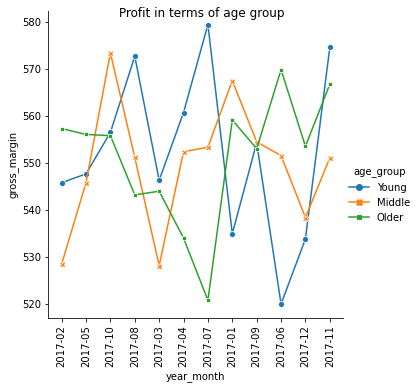

In [28]:
g=sns.relplot(x='year_month', y ='gross_margin',
           data=df_join,
           kind='line',
           style='age_group',
           hue='age_group',
           markers=True,
           dashes=False,
           ci=None)
g.fig.suptitle('Profit in terms of age group')
plt.xticks(rotation=90)
plt.show()

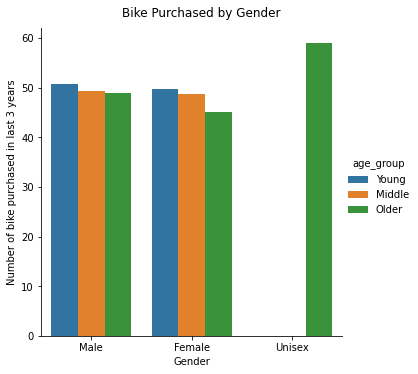

In [29]:
g=sns.catplot(x= 'gender',
           y='past_3_years_bike_related_purchases',
           data=df_join,
           kind='bar',
           hue='age_group',
           ci = None)
g.fig.suptitle("Bike Purchased by Gender",
           y=1.03)
g.set(xlabel='Gender',
     ylabel='Number of bike purchased in last 3 years')
plt.show()


In [ ]:
Young group has high count in terms of bike purchased in last 3 years
with a slightly greater male ratio. And this group has highest profit as seen in the line chart.

~>The target customer for our marketing should be inclined 
to provide focus on males than females and young groups.


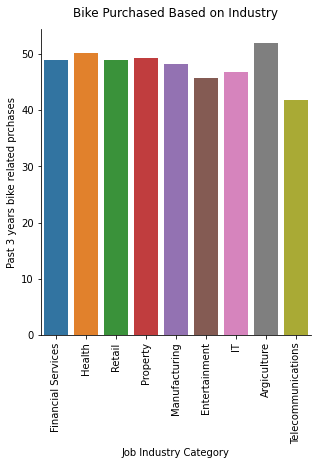

In [30]:
g=sns.catplot(x='job_industry_category',
             y='past_3_years_bike_related_purchases',
             data= df_join,
             kind='bar',
             ci=None)
g.fig.suptitle("Bike Purchased Based on Industry",
              y=1.03)
g.set(xlabel='Job Industry Category',
     ylabel= 'Past 3 years bike related prchases')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Health, Property and Argiculture are the top three consumption industries, 
followed by Retail and Finacial Services.

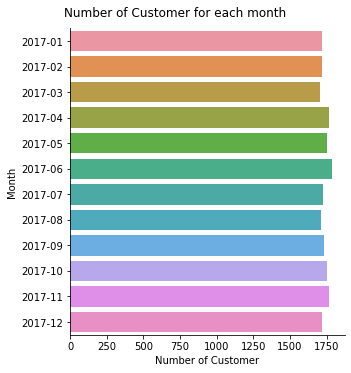

In [31]:
month_order= ['2017-01','2017-02','2017-03','2017-04','2017-05',
              '2017-06','2017-07','2017-08','2017-09','2017-10',
              '2017-11','2017-12']
g=sns.catplot(x='customer_id',
             y='year_month',
             data= df_join,
             kind='bar',
             order=month_order,
             ci=None)
g.fig.suptitle("Number of Customer for each month",
              y=1.03)
g.set(xlabel='Number of Customer',
     ylabel= 'Month')
plt.show()

In [ ]:
In the second quarter and the fourth quarter, the number of customers buys is more than the other two quarters
~> Promote marketing activities in the Q2 & Q4

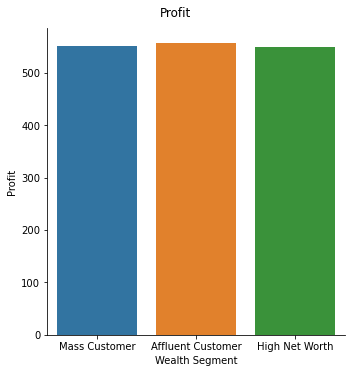

In [32]:
g=sns.catplot(x= 'wealth_segment',
           y='gross_margin',
           data=df_join,
           kind='bar',
             ci=None)
g.fig.suptitle("Profit",
           y=1.03)
g.set(xlabel='Wealth Segment',
     ylabel='Profit')
plt.show()


In [ ]:
The Affluent Customer is the group that brings the highest profit, followed by Mass customer and High Net Worth customer.
